# Predicting Restaurant Ratings

Develop a machine learning model to predict the aggregate rating of a restaurant based on various
features related to the restaurant's characteristics and operations.

Dataset Description
:
The dataset contains the following columns:
1. Restaurant ID: Unique identifier for each restaurant.
2. Restaurant Name: Name of the restaurant.
3. Country Code: Numeric code representing the country where the restaurant is located.
4. City: Name of the city where the restaurant is situated.
5. Address: Physical address of the restaurant.
6. Locality: Locality or neighborhood where the restaurant is located.
7. Locality Verbose: Detailed description of the locality.
8. Longitude: Geographical longitude of the restaurant's location.
9. Latitude: Geographical latitude of the restaurant's location.
10. Cuisines: Types of cuisines offered by the restaurant.
11. Average Cost for Two: Average cost for a meal for two people.
12. Currency: Currency used for transactions in the restaurant.
13. Has Table Booking: Indicator of whether the restaurant accepts table bookings.
14. Has Online Delivery: Indicator of whether the restaurant offers online delivery.
15. Is Delivering Now: Indicator of whether the restaurant is currently delivering.
16. Switch to Order Menu: Indicator of whether the restaurant has switched to an order menu.
17. Price Range: Price range category of the restaurant.
18. Aggregate Rating: Overall rating of the restaurant.
19. Rating Color: Color code representing the rating.
20. Rating Text: Text description of the rating.
21. Votes: Number of votes received by the restaurant.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Dataset.csv")

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.shape

(9551, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

from this command we can infer that the dataset has:

Discrete : 5 columns

Continious : 3 columns

Categorical : 13 columns

In [13]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
df.duplicated().sum()

0

In [20]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

We'll handle the missing values in the "Cuisines" column by filling them with a placeholder value such as "Unknown".

In [23]:
# Fill missing values in the 'Cuisines' column with 'Unknown'
df['Cuisines'].fillna('Unknown', inplace=True)


In [25]:
# Verify if there are any remaining missing values
missing_values = df.isnull().sum()
missing_values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

All missing values have been handled successfully. Now we can move on to analyzing the distribution of numeric and categorical features.

<Axes: xlabel='Aggregate rating', ylabel='Density'>

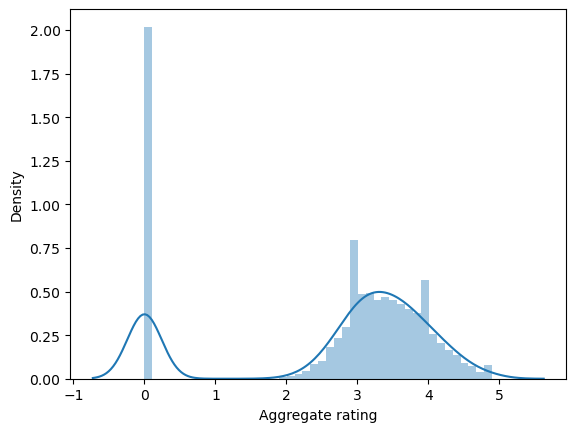

In [28]:
sns.distplot(df['Aggregate rating'])


In [29]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

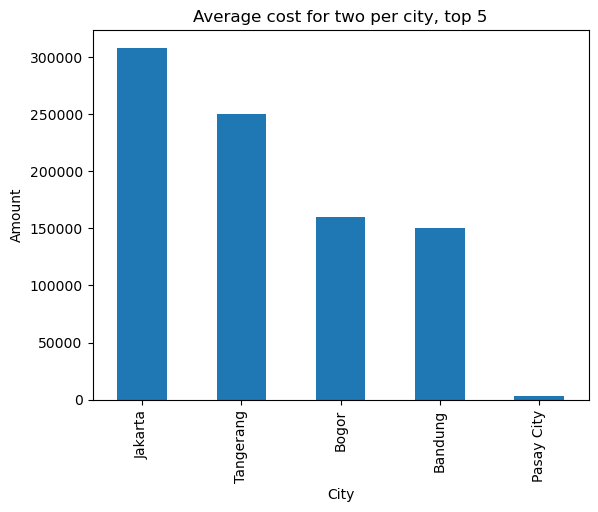

In [32]:
# Group by city and calculate avg cost \
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Average cost for two per city, top 5")
plt.xlabel("City")
plt.ylabel("Amount")
plt.show()

In [34]:
#cuisines total number of votes
data=df.groupby("Cuisines")["Votes"].sum().reset_index()

In [36]:
data[data["Votes"] != 0]


,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1821,"Western, Asian, Cafe",259
1822,"Western, Fusion, Fast Food",32
1823,World Cuisine,95
1824,"World Cuisine, Mexican, Italian",115


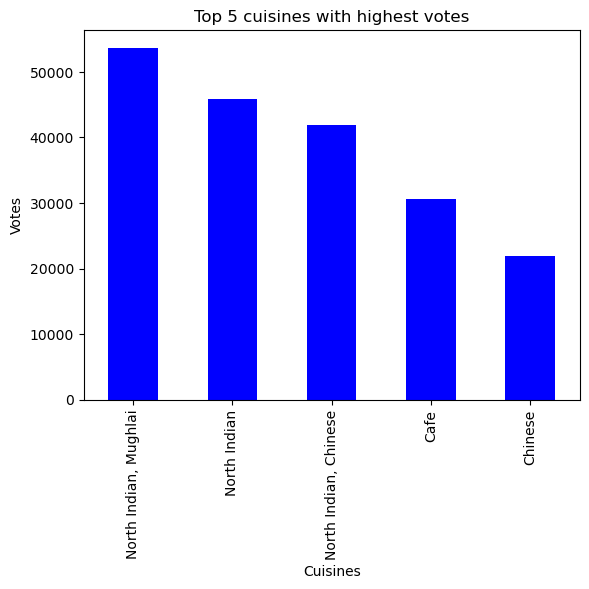

In [195]:
#Cusinine count
df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head().plot(kind='bar',color='blue')
plt.title('Top 5 cuisines with highest votes')
plt.xlabel('Cuisines')
plt.ylabel('Votes')

plt.show()

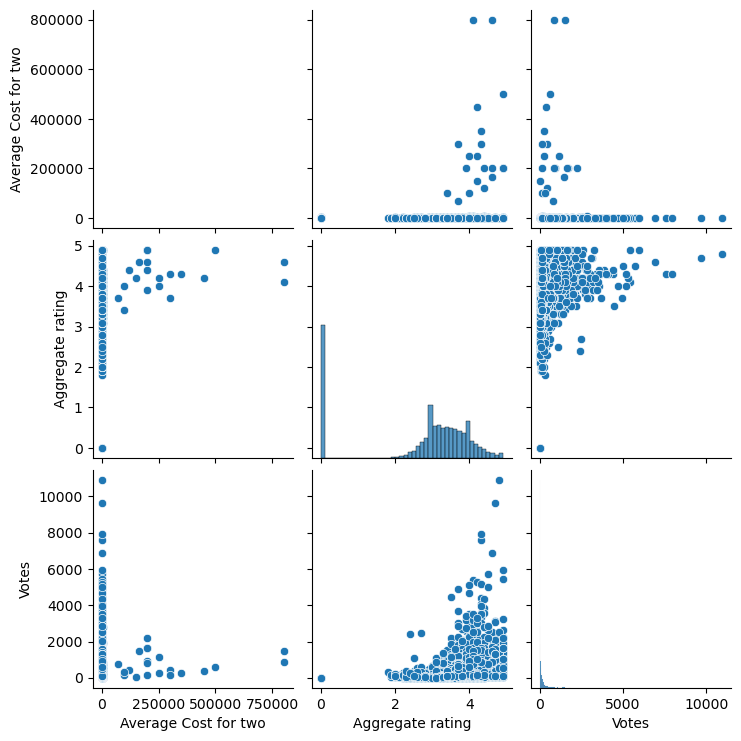

In [39]:
sns.pairplot(df[["Average Cost for two","Aggregate rating", "Votes"]])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

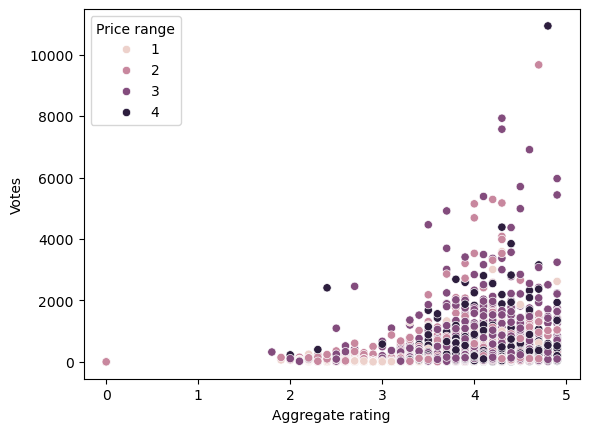

In [40]:

sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

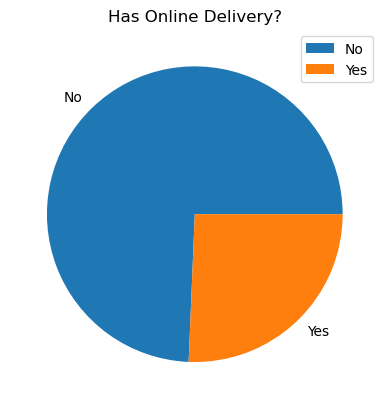

In [41]:
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Has Online Delivery?")
plt.ylabel("")
plt.legend()
plt.show()

In [42]:
df[["Aggregate rating","Rating text"]].sort_values(by="Aggregate rating", ascending=True)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
9514,4.9,Excellent
39,4.9,Excellent
324,4.9,Excellent
580,4.9,Excellent


In [43]:
df=df[df["Rating text"] != "Not rated"]

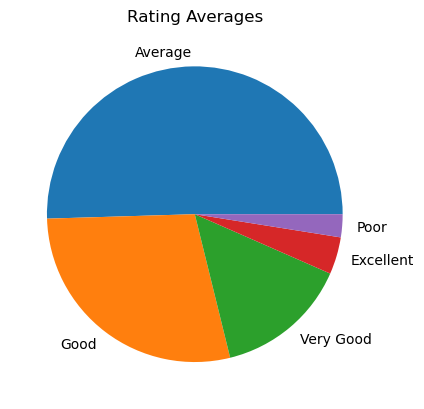

In [44]:
df["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating Averages")
plt.ylabel("")
plt.show()

In [45]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [46]:
X = df[["Average Cost for two", "Has Table booking","Has Online delivery","Price range"]]

In [47]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [48]:
Y = df[["Aggregate rating"]]

In [49]:
X["Price range"].value_counts()

Price range
1    2744
2    2711
3    1373
4     575
Name: count, dtype: int64

In [50]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [51]:
X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])

In [52]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


here 1 is yes and 0 is No

In [54]:
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])

In [55]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


Has Online delivery	0 is no and 1 is yes

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
X=scaler.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [61]:
from sklearn.metrics import mean_squared_error


In [62]:
def modelresults(predictions):
    print("Mean Squared Error:{}".format(mean_squared_error (y_test, predictions)))
    print('Root Mean Squared Error:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

### We are using regressor models here because the task involves predicting a continuous numerical value, which is the aggregate rating of a restaurant. In machine learning, regression models are specifically designed to predict continuous outcomes.

## Linear Regression:

- A simple regression model that assumes a linear relationship between the input features and the target variable.
- It aims to find the best-fit line that minimizes the sum of squared errors.

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [66]:
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
predictions_from_lr = lr.predict(X_test)

In [68]:
modelresults(predictions_from_lr)

Mean Squared Error:0.25200809530619905
Root Mean Squared Error:0.5020040789736664


## Support Vector Regression (SVR):

- SVR is based on the concept of Support Vector Machines (SVM).
- It tries to fit the best line within a specified margin, ignoring errors as long as they are within the margin.
- It is effective for high-dimensional datasets.

In [70]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [71]:
svrmodel=SVR() 

In [72]:
param_gridsvr={ "C":[0.1,0.5],"kernel":["rbf","poly"],"degree":[2,3]}

In [73]:
gridsearchsvr=GridSearchCV(svrmodel,param_gridsvr)

In [74]:
gridsearchsvr.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 3],
                         'kernel': ['rbf', 'poly']})

In [75]:
predsgridSearchsvr=gridsearchsvr.predict(X_test)

In [76]:
modelresults(predsgridSearchsvr)

Mean Squared Error:0.24043257508930976
Root Mean Squared Error:0.4903392449002117


## Decision Tree Regressor:

- A tree-based model that splits the data into subsets based on the value of input features.
- Each split aims to minimize the variance in the target variable within the subsets.
- It is easy to interpret but can overfit on the training data.

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
param_grid={
    "max_depth":[3,4,5,6,7,8,9,10],
    "min_samples_leaf":[1,2,3],
    "min_samples_split":[2,3,4,5]
}

In [80]:
treeModel=DecisionTreeRegressor()

In [81]:
grid_tree=GridSearchCV(treeModel,param_grid=param_grid)

In [82]:
grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [83]:
treepredictions = grid_tree.predict(X_test)

In [84]:
modelresults(treepredictions)

Mean Squared Error:0.21007029701415456
Root Mean Squared Error:0.458334263408437


## Random Forest Regressor:

- An ensemble method that combines multiple decision trees to improve prediction accuracy.
- Each tree is trained on a random subset of the data, and the final prediction is the average of all tree predictions.
- It reduces overfitting compared to a single decision tree.

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfrmodel=RandomForestRegressor()

In [88]:
param_gridrfr={"max_depth":[3,4,5,6,7,8,9,10],"n_estimators":[2,5,10]}


In [89]:
gridrfr= GridSearchCV(rfrmodel,param_grid=param_gridrfr)

In [90]:
gridrfr.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [2, 5, 10]})

In [91]:
RandomForestRegressorPredictions=gridrfr.predict(X_test)


In [92]:
modelresults(RandomForestRegressorPredictions)


Mean Squared Error:0.20939391162355644
Root Mean Squared Error:0.45759579502390146


In [93]:
gridrfr.best_params_

{'max_depth': 6, 'n_estimators': 10}

In [94]:
grid_tree.best_params_


{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4}

## K-Nearest Neighbors Regressor (KNN):

- A non-parametric method that predicts the target by averaging the values of the k-nearest neighbors.
- It is simple and intuitive but can be computationally expensive for large datasets.

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn_param_grid={"n_neighbors":[9,10,11,12,13,14,15,16]}
knn_grid_search=GridSearchCV(knn,knn_param_grid)

In [97]:
knn_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 10, 11, 12, 13, 14, 15, 16]})

In [98]:
knn_predictions=knn_grid_search.predict(X_test)

In [99]:
modelresults(knn_predictions)

Mean Squared Error:0.2248878766458474
Root Mean Squared Error:0.47422344590482596


In [100]:
knn_grid_search.best_params_

{'n_neighbors': 16}

## AdaBoost Regressor:

- An ensemble method that combines multiple weak learners (typically decision trees) to create a strong predictive model.
- It adjusts the weights of weak learners based on their performance, focusing more on difficult-to-predict instances.
- It can handle various types of data and improve model robustness.

In [102]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada_param_grid={"n_estimators": [50,100,150,200,250],
                "learning_rate": [0.1,0.25,0.5,0.75,1]}
ada_grid_search= GridSearchCV(ada,ada_param_grid)

In [103]:
ada_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.25, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [104]:
adapreds=ada_grid_search.predict(X_test)


In [105]:
modelresults(adapreds)


Mean Squared Error:0.22176280081494798
Root Mean Squared Error:0.4709169786862096


In [106]:
gridrfr


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [2, 5, 10]})

In [107]:
import joblib
joblib.dump(gridrfr,"mlmodel.pkl")

['mlmodel.pkl']

In [108]:
scaler

StandardScaler()

In [109]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']